# The Data Analyst vs. Data Scientist Project
###  Description:
According to the research conducted by IBM, the Big Data market has grown to over $187 billion today. People from other backgrounds seek to switch their careers into big data. The project is to explore the differences between a data analyst job and a data scientist job to facilitate career development of job seekers in this field.

### Motivation: 
As a student learning Data Science at BrainStation, I would like to know whether there are differences in the job descriptons between a data analyst and data scientist. This will help me in the future job recruiting process. I would also like to know which cities have the most job available for data analysts and data scientists, which companies hire the most, and the salary levels for both jobs.

### Hypothesis:
Job description is an accurate predictor of job type (Data analyst or Data Scientist) in the big data industry. Job description listed can help us predict whether it's a data analyst or a data scentist position. 

### About the datasets: 
The two data sets were found from Kaggle.com. The first dataset ("Analyst Dataset") on Data Analyst jobs contains more than 2000 job listings for data analyst scrapped from Glassdoor. The second dataset ("Scientist Dataset") on Data Scientist jobs contains more than 3900 job listings for data scientist jobs scrapped from Glassdoor. Both datasets features: 
1. Job Title 
2. Industry
3. Salary Estimate
4. Job Description
4. Location and more

# Step 0: Importing Useful Packages
## Here I'm using these libraries because: 
1. Pandas: For data analysis and manipulation
2. Numpy: For mathematical operations
3. matplotlib.pyplot: for data visualization
4. sklearn: For data modeling
5. WordCloud: Generate WordCloud
6. nltk: Remote stopwords to generate meaningful WordClouds


In [2]:
#Import useful packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ameliatang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ameliatang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Step 1: Datasets Overview

First, load the analyst dataset and the scientist dataset

In [3]:
analyst=pd.read_csv('Data/DataAnalyst.csv', index_col=0)
scientist=pd.read_csv('Data/DataScientist.csv')

Then, take a look at both datasets

In [72]:
analyst.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [4]:
scientist.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


Look at how many lines data I have in analyst dataset

In [74]:
len(analyst) #There are 2253 lines of data in analyst dataset

2253

In [75]:
len(scientist) #There are 3909 lines of data in the scientist dataset

3909

## Step 2: Data Cleaning and Manipulation

### Clean the "Salary Estimate" column of analyst dataset
- Split the min salary and max salary in the range and store the values to the "min salary" column and "max salary" column respectively 
- Remove "$" and "K"

In [5]:
analyst = analyst[analyst["Salary Estimate"] != "-1"]
analyst["Salary Estimate Clean"] = analyst["Salary Estimate"].str[:-16]
analyst['Min Salary'] = analyst["Salary Estimate Clean"].str.split('-',expand=True)[0]
analyst['Min Salary'] = analyst['Min Salary'].str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
analyst['Max Salary'] = analyst["Salary Estimate Clean"].str.split('-',expand=True)[1]
analyst['Max Salary'] = analyst['Max Salary'].str.lstrip('$').str.rstrip('K ').fillna(0).astype('int')
analyst.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Clean,Min Salary,Max Salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,$37K-$66K,37,66
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,$37K-$66K,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,$37K-$66K,37,66
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,$37K-$66K,37,66
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,$37K-$66K,37,66


### Treating the wrong values in the analyst dataset
Replace all the "-1" with NaN

In [6]:
analyst=analyst.replace(-1,np.nan)
analyst=analyst.replace(-1.0,np.nan)
analyst=analyst.replace('-1',np.nan)

analyst

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Clean,Min Salary,Max Salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,$37K-$66K,37,66
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,$37K-$66K,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,$37K-$66K,37,66
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,$37K-$66K,37,66
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,$37K-$66K,37,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,$78K-$104K,78,104
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,$78K-$104K,78,104
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$78K-$104K,78,104
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,$78K-$104K,78,104


### Adjust the index of the scientist dataset
There are additional index columbs in the dataset, so I changed the index of the scientist dataset 
and dropped useless column

In [7]:
scientist.drop(["Unnamed: 0","index"],axis=1,inplace=True)
scientist.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


### Clean the "Company Name" column of the analyst dataset 
- Replace decimal points and "\n" with ""
- Remove all numbers 
- Change the data type of the cleaned company name data to series and put into "Company Name Clean" column

In [11]:
analyst["Company Name Clean"]=analyst["Company Name"]

string=[]
for i in analyst["Company Name Clean"]:
    string.append(str(i))
string

new_string= []
new_string2 = []
for x in string:
    x=x.replace("\n","")
    x=x.replace(".","")
    new_string.append(x)
    res = ''.join([i for i in x if not i.isdigit()])
    new_string2.append(res)

print(new_string2)


['Vera Institute of Justice', 'Visiting Nurse Service of New York', 'Squarespace', 'Celerity', 'FanDuel', 'Point', 'Two Sigma', 'GNY Insurance Companies', 'DMGT', 'Riskified', 'NYU Langone Health', 'BulbHead', 'Montefiore Medical', 'Known', 'Advisor Group', 'CodeGreen Solutions', 'Undertone', 'NYSTEC', 'Education Development Center, Inc', 'Teachers Pay Teachers', 'Google', 'MUSIC & Entertainment', 'Macquarie Group', 'Andiamo', 'Dash Technologies Inc', 'Hearst Communications', 'Duolingo', 'Ro', 'Endai', 'BlueLabs', 'Revel', 'NALLAS CORPORATION', 'Pozent', 'SoFi', 'Carryst', 'Bank of America', 'Clear Street', 'Nutech Information Systems', 'NYU Langone Health', 'The Trevor Project', 'Pinto', 'AB InBev', 'Whip Media Group', 'Two International Inc', 'Vettery', 'Nesco Resource, LLC', 'Hearst Communications', 'MediaMath', 'Jordan & Jordan', 'Roku', 'Walt Disney Co', 'Citadel', 'Xoriant Corporation', 'Gemini', 'TSR, Inc', 'NADAP NYS INC', 'Walt Disney Co', 'Fragomen Worldwide', 'Bloomberg', 'R

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Clean,Min Salary,Max Salary,Company Name Clean
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,$37K-$66K,37,66,Vera Institute of Justice\n3.2
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,$37K-$66K,37,66,Visiting Nurse Service of New York\n3.8
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,$37K-$66K,37,66,Squarespace\n3.4
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,$37K-$66K,37,66,Celerity\n4.1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,$37K-$66K,37,66,FanDuel\n3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,$78K-$104K,78,104,"Avacend, Inc.\n2.5"
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,$78K-$104K,78,104,Arrow Electronics\n2.9
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$78K-$104K,78,104,Spiceorb
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,$78K-$104K,78,104,Contingent Network Services\n3.1


In [16]:
analyst["Company Name Clean"]= pd.Series(new_string2)
analyst.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Clean,Min Salary,Max Salary,Company Name Clean
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,$37K-$66K,37,66,Vera Institute of Justice
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,$37K-$66K,37,66,Visiting Nurse Service of New York
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,$37K-$66K,37,66,Squarespace
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,$37K-$66K,37,66,Celerity
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,$37K-$66K,37,66,FanDuel


### Clean the "Company Name" column of the Scientist dataset 
- Replace decimal points and "\n" with ""
- Remove all numbers 
- Change the data type of the cleaned company name data to series and put into "Company Name Clean" column

In [22]:
scientist["Company Name Clean"]=scientist["Company Name"]

string3=[]
for i in scientist["Company Name Clean"]:
    string3.append(str(i))
string3

new_string3= []
new_string4 = []
for x in string:
    x=x.replace("\n","")
    x=x.replace(".","")
    new_string.append(x)
    res = ''.join([i for i in x if not i.isdigit()])
    new_string4.append(res)

print(new_string4)

['Vera Institute of Justice', 'Visiting Nurse Service of New York', 'Squarespace', 'Celerity', 'FanDuel', 'Point', 'Two Sigma', 'GNY Insurance Companies', 'DMGT', 'Riskified', 'NYU Langone Health', 'BulbHead', 'Montefiore Medical', 'Known', 'Advisor Group', 'CodeGreen Solutions', 'Undertone', 'NYSTEC', 'Education Development Center, Inc', 'Teachers Pay Teachers', 'Google', 'MUSIC & Entertainment', 'Macquarie Group', 'Andiamo', 'Dash Technologies Inc', 'Hearst Communications', 'Duolingo', 'Ro', 'Endai', 'BlueLabs', 'Revel', 'NALLAS CORPORATION', 'Pozent', 'SoFi', 'Carryst', 'Bank of America', 'Clear Street', 'Nutech Information Systems', 'NYU Langone Health', 'The Trevor Project', 'Pinto', 'AB InBev', 'Whip Media Group', 'Two International Inc', 'Vettery', 'Nesco Resource, LLC', 'Hearst Communications', 'MediaMath', 'Jordan & Jordan', 'Roku', 'Walt Disney Co', 'Citadel', 'Xoriant Corporation', 'Gemini', 'TSR, Inc', 'NADAP NYS INC', 'Walt Disney Co', 'Fragomen Worldwide', 'Bloomberg', 'R

In [23]:
scientist["Company Name Clean"]= pd.Series(new_string4)
scientist.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Company Name Clean
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,Vera Institute of Justice
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,Visiting Nurse Service of New York
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,Squarespace
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,Celerity
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,FanDuel


### Clean the "Salary Estimate" column of scientist dataset
- Split the min salary and max salary in the range and store the values to the "min salary" column and "max salary" column respectively 
- Remove "$" and "K"

In [24]:
scientist = scientist[scientist["Salary Estimate"] != "-1"]
scientist["Salary Estimate Clean"] = scientist["Salary Estimate"].str[:-16]
scientist['Min Salary'] = scientist["Salary Estimate Clean"].str.split('-',expand=True)[0]
scientist['Min Salary'] = scientist['Min Salary'].str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
scientist['Max Salary'] = scientist["Salary Estimate Clean"].str.split('-',expand=True)[1]
scientist['Max Salary'] = scientist['Max Salary'].str.lstrip('$').str.rstrip('K ')
scientist

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Company Name Clean,Salary Estimate Clean,Min Salary,Max Salary
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,Vera Institute of Justice,$111K-$181K,111,181
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,Visiting Nurse Service of New York,$111K-$181K,111,181
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,Squarespace,$111K-$181K,111,181
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,Celerity,$111K-$181K,111,181
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,FanDuel,$111K-$181K,111,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1,NaN,$55K-$112K,55,112
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN,$55K-$112K,55,112
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1,NaN,$55K-$112K,55,112
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1,NaN,$55K-$112K,55,112


### Treating the wrong values in the scientist dataset
Replace all the "-1" with NaN

In [25]:
scientist=scientist.replace(-1,np.nan)
scientist=scientist.replace(-1.0,np.nan)
scientist=scientist.replace('-1',np.nan)

scientist

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Company Name Clean,Salary Estimate Clean,Min Salary,Max Salary
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,NaN,NaN,Vera Institute of Justice,$111K-$181K,111,181
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,NaN,NaN,Visiting Nurse Service of New York,$111K-$181K,111,181
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,NaN,True,Squarespace,$111K-$181K,111,181
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",NaN,Celerity,$111K-$181K,111,181
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",NaN,FanDuel,$111K-$181K,111,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011.0,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),NaN,NaN,NaN,$55K-$112K,55,112
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,NaN,$55K-$112K,55,112
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977.0,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),NaN,NaN,NaN,$55K-$112K,55,112
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,NaN,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),NaN,NaN,NaN,$55K-$112K,55,112


### Data Manipulations
Since our hypothesis is that the job description could accurately predict the data job type and distinguish whether it is a data analyst job or a data scientist job. We will define our predicted values as: 
- Type - data analyst 
- Type - data scientist 

First, add the "Type" column to the analyst datasets to indicate these jobs belong to the data analyst category. 

In [26]:
analyst["Type"]="Data Analyst" 
analyst.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Clean,Min Salary,Max Salary,Company Name Clean,Type
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,$37K-$66K,37,66,Vera Institute of Justice,Data Analyst
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,$37K-$66K,37,66,Visiting Nurse Service of New York,Data Analyst
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,$37K-$66K,37,66,Squarespace,Data Analyst
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,$37K-$66K,37,66,Celerity,Data Analyst
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,$37K-$66K,37,66,FanDuel,Data Analyst


Then, add the "Type" column to the scientist datasets to indicate these jobs belong to the data scientist category.

In [27]:
scientist["Type"]="Data Scientist"
scientist.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Company Name Clean,Salary Estimate Clean,Min Salary,Max Salary,Type
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,NaN,NaN,Vera Institute of Justice,$111K-$181K,111,181,Data Scientist
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,NaN,NaN,Visiting Nurse Service of New York,$111K-$181K,111,181,Data Scientist
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,NaN,True,Squarespace,$111K-$181K,111,181,Data Scientist
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",NaN,Celerity,$111K-$181K,111,181,Data Scientist
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",NaN,FanDuel,$111K-$181K,111,181,Data Scientist


### Combine the Datasets
Becuase the datasets have the same columns, there is no need to worry about indexing, the append function should work

In [28]:
df = analyst.append(scientist, ignore_index=True)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Clean,Min Salary,Max Salary,Company Name Clean,Type
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,$37K-$66K,37,66,Vera Institute of Justice,Data Analyst
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,$37K-$66K,37,66,Visiting Nurse Service of New York,Data Analyst
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,$37K-$66K,37,66,Squarespace,Data Analyst
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,$37K-$66K,37,66,Celerity,Data Analyst
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,$37K-$66K,37,66,FanDuel,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011.0,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),NaN,NaN,$55K-$112K,55,112,NaN,Data Scientist
6157,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,$55K-$112K,55,112,NaN,Data Scientist
6158,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977.0,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),NaN,NaN,$55K-$112K,55,112,NaN,Data Scientist
6159,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,NaN,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),NaN,NaN,$55K-$112K,55,112,NaN,Data Scientist


## Step 3: Data Visualizations
### Identify the Top 30 locations to have the most data analyst positions.
It looks like New York, Chicago and San Francisco are among the top 3 for available data scientist jobs. 

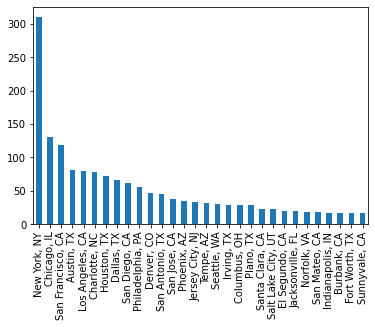

In [29]:
analyst_chart_location = analyst.groupby('Location').agg(len)
analyst_chart_location_sorted = analyst_chart_location.sort_values(['Company Name Clean'], ascending=False).head(30)
analyst_chart_location_sorted.index.name = None
analyst_chart_location_sorted = analyst_chart_location_sorted['Company Name Clean']
analyst_chart_location_sorted.plot.bar();

### Identify the Top 30 locations to have the most data scientist positions. 
It looks like Austin, Chicago and San Diego are among the top 3 for available data scientist jobs. 

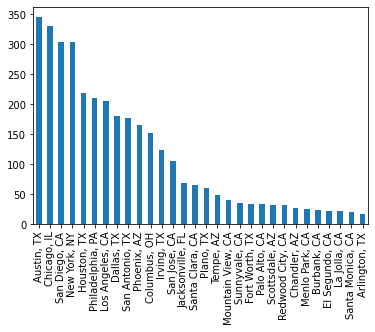

In [30]:
scientist_chart_location = scientist.groupby('Location').agg(len)
scientist_chart_location_sorted = scientist_chart_location.sort_values(['Company Name Clean'], ascending=False).head(30)
scientist_chart_location_sorted.index.name = None
scientist_chart_location_sorted = scientist_chart_location_sorted['Company Name Clean']
scientist_chart_location_sorted.plot.bar();

### Identify the Top 30 locations to have the most positions related to data (data analyst and data scientist combined).
It looks like New York, Chicago and Austin are among the top 3 for available data-related jobs.

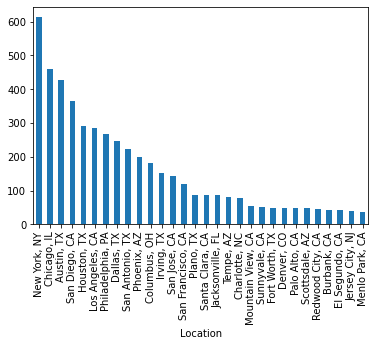

In [27]:
df_chart_location = df.groupby('Location').agg(len)
df_chart_location_sorted = df_chart_location.sort_values(['Job Title'], ascending=False).head(30)
df_chart_location_sorted = df_chart_location_sorted['Job Title']
df_chart_location_sorted.plot.bar();

### Among all the data jobs listings, what proportion of job listings is data analyst and what propotion is data scientist? 
Let's create a pie chart and explore:

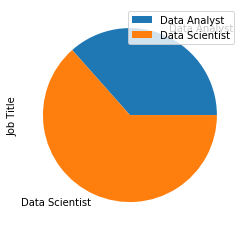

In [28]:
df_chart = df.groupby('Type').agg(len)
df_chart.index.name = None
df_chart.head()
df_chart.plot.pie(y='Job Title');

It looks like proportionally, from the datasets scraped from Glassdoor, there are more data scientist jobs than data analyst jobs available in the United States.

### Which companies have the most openings in data-related positions? 
- The top is Staffigo Technical Services, an IT staffing company
- The second is Diverse Lynx
- The third is Lorven Technologies Inc

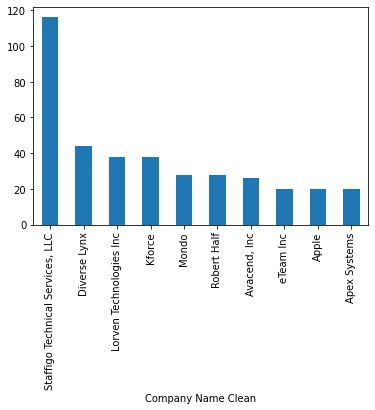

In [31]:
df_chart_company = df.groupby('Company Name Clean').agg(len)
df_chart_company_sorted = df_chart_company.sort_values(['Job Title'], ascending=False).head(10)
df_chart_company_sorted = df_chart_company_sorted['Job Title']
df_chart_company_sorted.plot.bar();

## Which companies have the most openings in data scientist positions? 
- Top is Apple
- The second is IBM 
- The third is Amazon, an American multinational technology company focusing on e-commerce and cloud computing

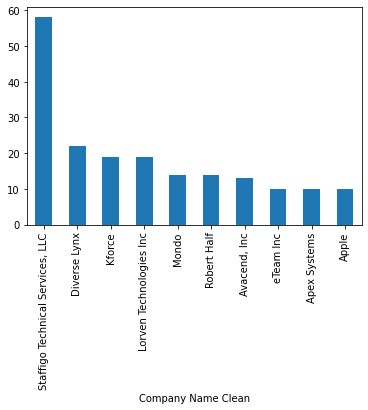

In [32]:
scientist_chart_company = scientist.groupby('Company Name Clean').agg(len)
scientist_chart_company_sorted = scientist_chart_company.sort_values(['Job Title'], ascending=False).head(10)
scientist_chart_company_sorted = scientist_chart_company_sorted['Job Title']
scientist_chart_company_sorted.plot.bar();

## Which companies have the most openings in data analyst positions?
- Top is Staffigo Technical Services, an IT staffing company
- The second is Diverse Lynx, an IT staffing and consulting company 
- The third is Lorven Technologies Inc, a professional technology consulting company

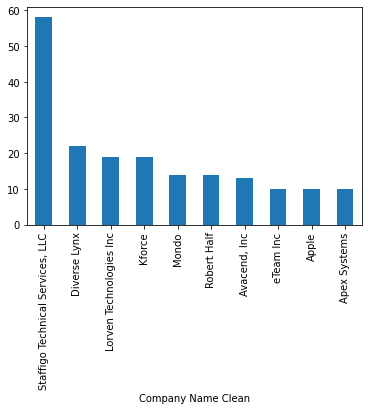

In [33]:
analyst_chart_company = analyst.groupby('Company Name Clean').agg(len)
analyst_chart_company_sorted = analyst_chart_company.sort_values(['Job Title'], ascending=False).head(10)
analyst_chart_company_sorted = analyst_chart_company_sorted['Job Title']
analyst_chart_company_sorted.plot.bar();

What's the most frequent min salary for data analyst? It looks like most frequent min salary a data analyst receive is $42K. 


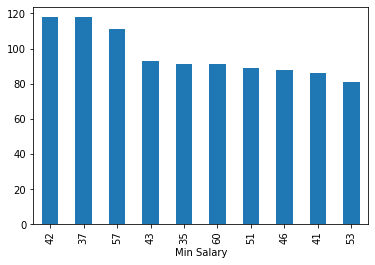

In [32]:
analyst_chart_company = analyst.groupby('Min Salary').agg(len)
analyst_chart_company_sorted = analyst_chart_company.sort_values(['Job Title'], ascending=False).head(10)
analyst_chart_company_sorted = analyst_chart_company_sorted['Job Title']
analyst_chart_company_sorted.plot.bar();

What's the most frequent max salary for data analyst? It looks like most frequent max salary a data analyst receive is $76K.

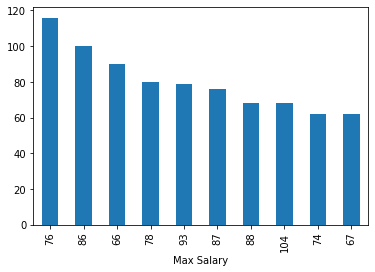

In [33]:
analyst_chart_company = analyst.groupby('Max Salary').agg(len)
analyst_chart_company_sorted = analyst_chart_company.sort_values(['Job Title'], ascending=False).head(10)
analyst_chart_company_sorted = analyst_chart_company_sorted['Job Title']
analyst_chart_company_sorted.plot.bar();

What's the most frequent min salary for data scientist? It looks like most frequent min salary a data scientist receive is $76K.


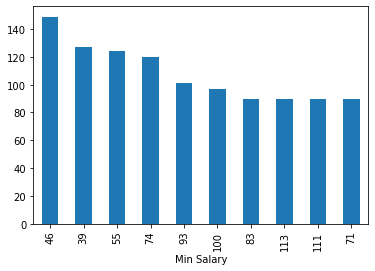

In [34]:
scientist_chart_company = scientist.groupby('Min Salary').agg(len)
scientist_chart_company_sorted = scientist_chart_company.sort_values(['Job Title'], ascending=False).head(10)
scientist_chart_company_sorted = scientist_chart_company_sorted['Job Title']
scientist_chart_company_sorted.plot.bar();

What's the most frequent max salary for data scientist? It looks like most frequent max salary a data scientist receive is $144K.

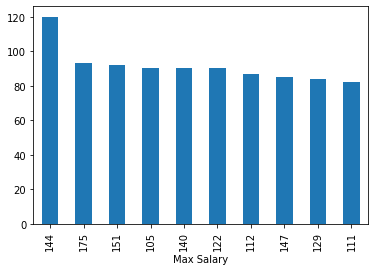

In [35]:
scientist_chart_company = scientist.groupby('Max Salary').agg(len)
scientist_chart_company_sorted = scientist_chart_company.sort_values(['Job Title'], ascending=False).head(10)
scientist_chart_company_sorted = scientist_chart_company_sorted['Job Title']
scientist_chart_company_sorted.plot.bar();

## WordCloud
Generate wordclouds to capture the frequently mentioned words in job descriptions for data analyst and data scientist to further explore the differences in their responsiblities/required skills etc. I was only able to use the 5 job descriptions for data analyst and data scientist due to my computer speed. Ideally, I would like to analyze the entire datasets.

First step is to combine all the words in the job descriptions for data analyst into a list and convert the list to a string.

In [94]:
analyst_vis = analyst.head(5)
analyst_vis["list of words"] = analyst["Job Description"].head(5)
analyst_vis_lists = []
for x in analyst_vis["list of words"]:
    x = x.split()
    analyst_vis_lists.append(x)
analyst_listToStr = ' '.join([str(n) for n in analyst_vis_lists]) 
analyst_listToStr

<ipython-input-94-36e88ba634fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyst_vis["list of words"] = analyst["Job Description"].head(5)


'[\'Are\', \'you\', \'eager\', \'to\', \'roll\', \'up\', \'your\', \'sleeves\', \'and\', \'harness\', \'data\', \'to\', \'drive\', \'policy\', \'change?\', \'Do\', \'you\', \'enjoy\', \'sifting\', \'through\', \'complex\', \'datasets\', \'to\', \'illuminate\', \'trends\', \'and\', \'insights?\', \'Do\', \'you\', \'see\', \'yourself\', \'working\', \'for\', \'a\', \'values-driven\', \'organization\', \'with\', \'a\', \'vision\', \'to\', \'tackle\', \'the\', \'most\', \'pressing\', \'injustices\', \'of\', \'our\', \'day?\', \'We\', \'are\', \'looking\', \'to\', \'hire\', \'a\', \'bright,\', \'hard-working,\', \'and\', \'creative\', \'individual\', \'with\', \'strong\', \'data\', \'management\', \'skills\', \'and\', \'a\', \'demonstrated\', \'commitment\', \'to\', "immigrant\'s", \'rights.\', \'The\', \'Data\', \'Analyst\', \'will\', \'assist\', \'with\', \'analysis\', \'and\', \'reporting\', \'needs\', \'for\', \'Veras\', \'Center\', \'on\', \'Immigration\', \'and\', \'Justice\', \'(CIJ)

Next step is to remove common English words such as "And", "You" so that the wordcloud won't capture these words. To remove common English words, I used the nltk pacakge. While the WordCloud function has built-in feature to remove stopwords but it is not very effective after trying it out. 

In [95]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(analyst_listToStr) 

In [96]:
filtered_analyst = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_analyst.append(w) 
  
filtered_analyst_str =" ".join([str(n) for n in filtered_analyst]) 
filtered_analyst_str

"[ 'Are ' , 'you ' , 'eager ' , 'to ' , 'roll ' , 'up ' , 'your ' , 'sleeves ' , 'and ' , 'harness ' , 'data ' , 'to ' , 'drive ' , 'policy ' , 'change ? ' , 'Do ' , 'you ' , 'enjoy ' , 'sifting ' , 'through ' , 'complex ' , 'datasets ' , 'to ' , 'illuminate ' , 'trends ' , 'and ' , 'insights ? ' , 'Do ' , 'you ' , 'see ' , 'yourself ' , 'working ' , 'for ' , ' ' , 'values-driven ' , 'organization ' , 'with ' , ' ' , 'vision ' , 'to ' , 'tackle ' , 'the ' , 'most ' , 'pressing ' , 'injustices ' , 'of ' , 'our ' , 'day ? ' , 'We ' , 'are ' , 'looking ' , 'to ' , 'hire ' , ' ' , 'bright , ' , 'hard-working , ' , 'and ' , 'creative ' , 'individual ' , 'with ' , 'strong ' , 'data ' , 'management ' , 'skills ' , 'and ' , ' ' , 'demonstrated ' , 'commitment ' , 'to ' , `` immigrant 's '' , 'rights . ' , 'The ' , 'Data ' , 'Analyst ' , 'will ' , 'assist ' , 'with ' , 'analysis ' , 'and ' , 'reporting ' , 'needs ' , 'for ' , 'Veras ' , 'Center ' , 'on ' , 'Immigration ' , 'and ' , 'Justice ' ,

Now that the common English words have been removed from the string for data analyst job descriptions, I am using the WordCloud and matplotlib.pyplot packages. 

In [97]:
wordcloud_analyst = WordCloud(width = 6000, height = 4000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(filtered_analyst_str)

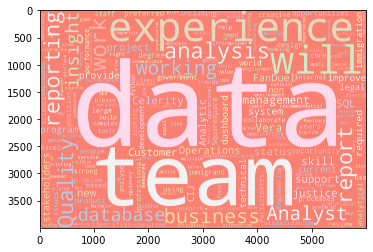

In [71]:
plt.imshow(wordcloud_analyst)

Now, I repeated the process for data scientist's job description and generated the WordCloud for data scientist.

In [87]:
scientist_vis = scientist.head(5)
scientist_vis["list of words"] = scientist["Job Description"].head(5)
scientist_vis_lists = []
for x in scientist_vis["list of words"]:
    x = x.split()
    scientist_vis_lists.append(x)
scientist_listToStr = ' '.join([str(n) for n in scientist_vis_lists]) 
scientist_listToStr

<ipython-input-87-f616cce2a16a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scientist_vis["list of words"] = scientist["Job Description"].head(5)


'[\'ABOUT\', \'HOPPER\', \'At\', \'Hopper,\', \'we’re\', \'on\', \'a\', \'mission\', \'to\', \'make\', \'booking\', \'travel\', \'faster,\', \'easier,\', \'and\', \'more\', \'transparent.\', \'We\', \'are\', \'leveraging\', \'the\', \'power\', \'that\', \'comes\', \'from\', \'combining\', \'massive\', \'amounts\', \'of\', \'data\', \'and\', \'machine\', \'learning\', \'to\', \'build\', \'the\', \'world’s\', \'fastest-growing\', \'travel\', \'app\', \'--\', \'one\', \'that\', \'enables\', \'our\', \'customers\', \'to\', \'save\', \'money\', \'and\', \'travel\', \'more.\', \'With\', \'over\', \'$235M\', \'CAD\', \'in\', \'funding\', \'from\', \'leading\', \'investors\', \'in\', \'both\', \'Canada\', \'and\', \'the\', \'US,\', \'Hopper\', \'is\', \'primed\', \'to\', \'continue\', \'its\', \'path\', \'toward\', \'becoming\', \'the\', \'go-to\', \'way\', \'to\', \'book\', \'travel\', \'as\', \'the\', \'world\', \'continues\', \'its\', \'shift\', \'to\', \'mobile.\', \'Recognized\', \'as\', 

In [88]:
word_tokens1 = word_tokenize(scientist_listToStr)

In [89]:
filtered_scientist = [] 
  
for w in word_tokens1: 
    if w not in stop_words: 
        filtered_scientist.append(w) 
  
filtered_scientist_str =" ".join([str(n) for n in filtered_scientist]) 
filtered_scientist_str

"[ 'ABOUT ' , 'HOPPER ' , 'At ' , 'Hopper , ' , 'we ’ ' , 'on ' , ' ' , 'mission ' , 'to ' , 'make ' , 'booking ' , 'travel ' , 'faster , ' , 'easier , ' , 'and ' , 'more ' , 'transparent . ' , 'We ' , 'are ' , 'leveraging ' , 'the ' , 'power ' , 'that ' , 'comes ' , 'from ' , 'combining ' , 'massive ' , 'amounts ' , 'of ' , 'data ' , 'and ' , 'machine ' , 'learning ' , 'to ' , 'build ' , 'the ' , 'world ’ ' , 'fastest-growing ' , 'travel ' , 'app ' , ' -- ' , 'one ' , 'that ' , 'enables ' , 'our ' , 'customers ' , 'to ' , 'save ' , 'money ' , 'and ' , 'travel ' , 'more . ' , 'With ' , 'over ' , ' $ 235M ' , 'CAD ' , 'in ' , 'funding ' , 'from ' , 'leading ' , 'investors ' , 'in ' , 'both ' , 'Canada ' , 'and ' , 'the ' , 'US , ' , 'Hopper ' , 'is ' , 'primed ' , 'to ' , 'continue ' , 'its ' , 'path ' , 'toward ' , 'becoming ' , 'the ' , 'go-to ' , 'way ' , 'to ' , 'book ' , 'travel ' , 'as ' , 'the ' , 'world ' , 'continues ' , 'its ' , 'shift ' , 'to ' , 'mobile . ' , 'Recognized ' ,

In [92]:
wordcloud_scientist = WordCloud(width = 6000, height = 4000, random_state=1, background_color='blue', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(filtered_scientist_str)

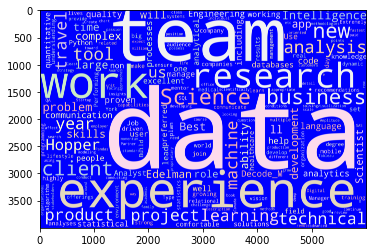

In [93]:
plt.imshow(wordcloud_scientist)

Comparing the two WordClouds, it seems that both job positions require data and teamwork skills. Data scientist requires more experience, more technical skills and reasearch ability.  

## Step 4: Data Modeling 

In [79]:
from sklearn.feature_extraction import text  # some text processing tools
from sklearn.naive_bayes import MultinomialNB

In [ ]:
word_bagger = text.CountVectorizer(stop_words="english")
word_bagger.fit(df["Job Description"])

In [ ]:
all_words = word_bagger.get_feature_names()
len(all_words)

In [82]:
all_words[1000:1005]

['2wk', '2x', '2x2', '2x76bcyuvz', '2yr']

In [83]:
y = df['Type']
X= word_bagger.transform(df['Job Description'])

In [84]:
type_nb = MultinomialNB()
type_nb.fit(X, y)

MultinomialNB()

In [85]:
type_nb.score(X,y)

0.827138451550073

# Step 5: Model Validation 
First, I used one random selected sentence each from the descriptions for data scientist and data analyst on indeed.com, another job posting 
wesite and tested the model. The model was right this time.

In [86]:
data_analyst='Use graphs, infographics and other methods to visualize data'

data_science='Use predictive modeling to increase and optimize customer experiences revenue generation ad targeting and other business outcomes.'

bagged = word_bagger.transform([data_analyst, data_science])
bagged.shape

(2, 31737)

In [87]:
type_nb.predict(bagged)

array(['Data Analyst', 'Data Scientist'], dtype='<U14')

In [111]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df['Job Description'], df['Type'], test_size = 0.2, random_state = 0)

In [116]:
yTrain

5545    0
2980    0
3639    0
2060    1
3287    0
       ..
4931    0
3264    0
1653    1
2607    0
2732    0
Name: Type, Length: 4928, dtype: int64

In [117]:
yTest

2600    0
2460    0
3321    0
4719    0
247     1
       ..
933     1
3619    0
3669    0
4631    0
1831    1
Name: Type, Length: 1233, dtype: int64

In [119]:
word_bagger = text.CountVectorizer(stop_words="english")
word_bagger.fit(xTrain)

CountVectorizer(stop_words='english')

In [120]:
y = yTrain
X= word_bagger.transform(xTrain)

In [121]:
type_nb = MultinomialNB()
type_nb.fit(X, y)

MultinomialNB()

In [122]:
type_nb.score(X,y)

0.8315746753246753

In [123]:
# Test
y_test = yTest
X_test = word_bagger.transform(xTest)

type_nb.score(X_test,y_test)

0.7826439578264396

# Conclusion: 
## From data explorations: 
- New York City has the most data-related positions opening. It has the most data analyst position opening while Austin, TX has the most job opening for data scientists. 
- The minimum and maximum salary for a data analyst is frequently lower than that of a data scientist. 
- While both types of jobs require data analysis skills and teamwork ability, data scientist requires more experience, more technical and research skills.    
- While multinational technology companies, such as Apple, IBM and Amazon has the most amount of openings for data scientists, IT staffing and technology consulting company has the most amount of openiengs for data analysts. 

## From data modeling: 
The model predicts the job type (data analyst v. data scientist) based on the description with 78% accuracy. Job description is a useful predictor of job type in the Big Data field. 
